<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n250.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.955621,-0.016561,94.939060,94.870960,0.068100
1,0.0,1.0,55.868741,0.190678,66.059419,65.895121,0.164298
2,0.0,2.0,87.966058,-0.200262,97.765796,97.869905,-0.104108
3,0.0,3.0,69.195685,0.006095,79.201780,79.171188,0.030592
4,0.0,4.0,69.684530,-0.098158,79.586371,79.658167,-0.071796
...,...,...,...,...,...,...,...
19995,999.0,15.0,23.356473,-0.178029,33.178444,33.382115,-0.203671
19996,999.0,16.0,46.375100,-0.118884,56.256216,56.396024,-0.139808
19997,999.0,17.0,43.972890,-0.253866,53.719024,53.994306,-0.275282
19998,999.0,18.0,47.192385,0.083359,57.275744,57.213141,0.062603


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.955621,-0.016561,94.939060,94.870960,0.068100
1,0.0,1.0,55.868741,0.190678,66.059419,65.895121,0.164298
2,0.0,2.0,87.966058,-0.200262,97.765796,97.869905,-0.104108
3,0.0,3.0,69.195685,0.006095,79.201780,79.171188,0.030592
4,0.0,4.0,69.684530,-0.098158,79.586371,79.658167,-0.071796
...,...,...,...,...,...,...,...
19995,999.0,15.0,23.356473,-0.178029,33.178444,33.382115,-0.203671
19996,999.0,16.0,46.375100,-0.118884,56.256216,56.396024,-0.139808
19997,999.0,17.0,43.972890,-0.253866,53.719024,53.994306,-0.275282
19998,999.0,18.0,47.192385,0.083359,57.275744,57.213141,0.062603


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    84.955621 -0.016561   94.939060   94.870960  0.068100
      1.0    55.868741  0.190678   66.059419   65.895121  0.164298
      2.0    87.966058 -0.200262   97.765796   97.869905 -0.104108
      3.0    69.195685  0.006095   79.201780   79.171188  0.030592
      4.0    69.684530 -0.098158   79.586371   79.658167 -0.071796
...                ...       ...         ...         ...       ...
999.0 15.0   23.356473 -0.178029   33.178444   33.382115 -0.203671
      16.0   46.375100 -0.118884   56.256216   56.396024 -0.139808
      17.0   43.972890 -0.253866   53.719024   53.994306 -0.275282
      18.0   47.192385  0.083359   57.275744   57.213141  0.062603
      19.0   96.651545  0.006032  106.657577  106.662164 -0.004587

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    84.955621 -0.016561   94.939060   94.870960  0.068100
      1.0    55.868741  0.190678   66.059419   65.895121  0.164298
      2.0    87.966058 -0.200262   97.765796   97.869905 -0.104108
      3.0    69.195685  0.006095   79.201780   79.171188  0.030592
      4.0    69.684530 -0.098158   79.586371   79.658167 -0.071796
...                ...       ...         ...         ...       ...
999.0 15.0   23.356473 -0.178029   33.178444   33.382115 -0.203671
      16.0   46.375100 -0.118884   56.256216   56.396024 -0.139808
      17.0   43.972890 -0.253866   53.719024   53.994306 -0.275282
      18.0   47.192385  0.083359   57.275744   57.213141  0.062603
      19.0   96.651545  0.006032  106.657577  106.662164 -0.004587

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.955621,-0.016561,94.939060,94.870960,0.068100
1,0.0,1.0,55.868741,0.190678,66.059419,65.895121,0.164298
2,0.0,2.0,87.966058,-0.200262,97.765796,97.869905,-0.104108
3,0.0,3.0,69.195685,0.006095,79.201780,79.171188,0.030592
4,0.0,4.0,69.684530,-0.098158,79.586371,79.658167,-0.071796
...,...,...,...,...,...,...,...
19995,999.0,15.0,23.356473,-0.178029,33.178444,33.382115,-0.203671
19996,999.0,16.0,46.375100,-0.118884,56.256216,56.396024,-0.139808
19997,999.0,17.0,43.972890,-0.253866,53.719024,53.994306,-0.275282
19998,999.0,18.0,47.192385,0.083359,57.275744,57.213141,0.062603


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    84.955621 -0.016561   94.939060   94.870960  0.068100
      1.0    55.868741  0.190678   66.059419   65.895121  0.164298
      2.0    87.966058 -0.200262   97.765796   97.869905 -0.104108
      3.0    69.195685  0.006095   79.201780   79.171188  0.030592
      4.0    69.684530 -0.098158   79.586371   79.658167 -0.071796
...                ...       ...         ...         ...       ...
999.0 15.0   23.356473 -0.178029   33.178444   33.382115 -0.203671
      16.0   46.375100 -0.118884   56.256216   56.396024 -0.139808
      17.0   43.972890 -0.253866   53.719024   53.994306 -0.275282
      18.0   47.192385  0.083359   57.275744   57.213141  0.062603
      19.0   96.651545  0.006032  106.657577  106.662164 -0.004587

[20000 rows x 5 columns]

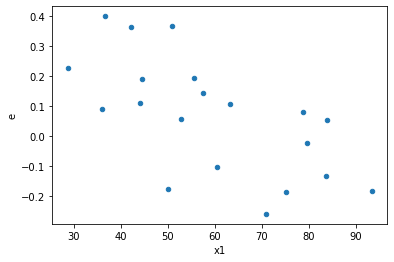

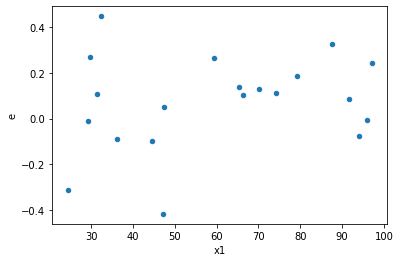

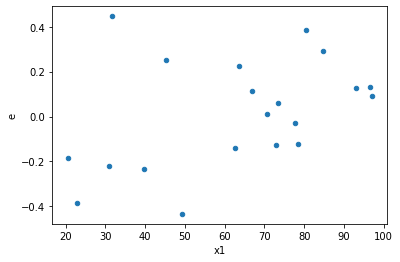

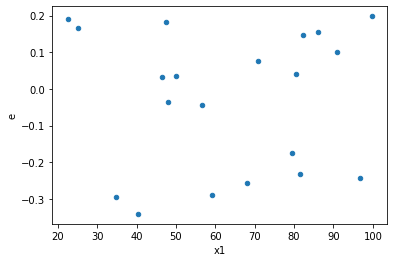

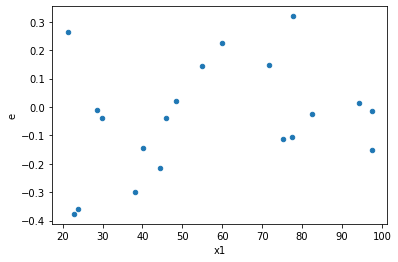

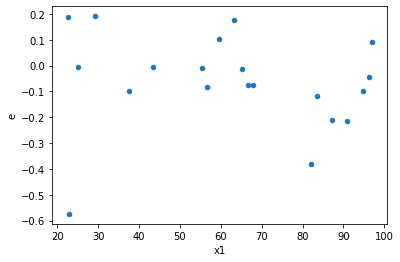

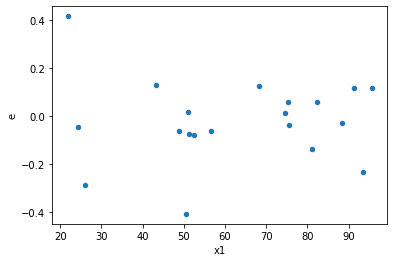

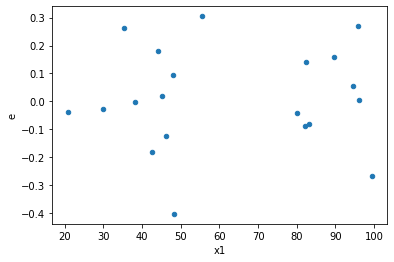

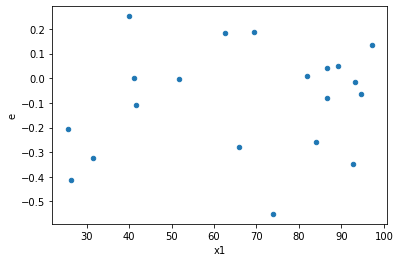

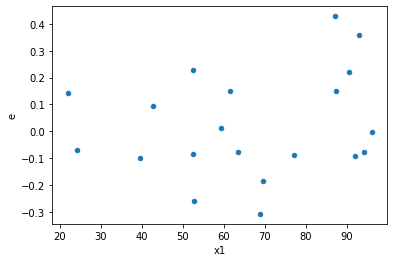

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,0.21933832765788028,0.24133437952083625,0.03133404680826861,0.034476339931548035,1.1002836672360565,0.9029138421161533,0.5485430789419233,0.45145692105807667,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,0.10136951163849,0.2640621747513565,0.014481358805498572,0.03772316782162236,2.604946699290323,0.22979963463930342,0.8851001826803483,0.11489981731965171,Reject005=1 : Homoscedasticity
9.0,7.0,7.0,0.10122730717260595,0.1666579895737681,0.01446104388180085,0.023808284224824013,1.6463738316143703,0.526497909712373,0.7367510451438135,0.2632489548561865,Reject005=1 : Homoscedasticity
17.0,7.0,7.0,0.150663273764865,0.20280220857013867,0.021523324823552143,0.02897174408144838,1.3460626701013088,0.7048949728049894,0.6475525135975053,0.3524474864024947,Reject005=1 : Homoscedasticity
19.0,7.0,7.0,0.16584740385986613,0.30427375963684844,0.023692486265695163,0.04346767994812121,1.8346609748196396,0.4418203827528264,0.7790898086235868,0.2209101913764132,Reject005=1 : Homoscedasticity
21.0,7.0,7.0,0.09529406575848097,0.12723200460024647,0.013613437965497282,0.018176000657178067,1.3351513925611163,0.7125870274245272,0.6437064862877364,0.3562935137122636,Reject005=1 : Homoscedasticity
26.0,7.0,7.0,0.260133085766661,0.3098966985329349,0.03716186939523729,0.044270956933276415,1.1913005899253883,0.8232794999005704,0.5883602500497148,0.4116397499502852,Reject005=1 : Homoscedasticity
28.0,7.0,7.0,0.4051872739657617,0.5171893121826132,0.0578838962808231,0.07388418745465904,1.2764204243648476,0.7556489510758722,0.6221755244620639,0.3778244755379361,Reject005=1 : Homoscedasticity
35.0,7.0,7.0,0.09412198191126511,0.3215520362819339,0.013445997415895016,0.04593600518313341,3.416333036687241,0.12736113742639388,0.9363194312868031,0.06368056871319694,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,0.163033012132128,0.08838665130953831,0.023290430304589715,0.012626664472791187,0.5421395958623796,0.43784771543320844,Reject005=1 : Homoscedasticity
1.0,7.0,7.0,0.21933832765788028,0.24133437952083625,0.03133404680826861,0.034476339931548035,1.1002836672360565,0.9029138421161533,Reject005=1 : Homoscedasticity
2.0,7.0,7.0,0.20976614599182605,0.03423467215565481,0.029966592284546578,0.00489066745080783,0.1632039907764184,0.02891220790697306,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,0.35949828906822884,0.07902525652832018,0.05135689843831841,0.011289322361188597,0.21982095306529276,0.06360906180718855,Reject005=1 : Homoscedasticity
4.0,7.0,7.0,0.30983286689327416,0.16358808370254369,0.044261838127610593,0.023369726243220527,0.5279881548489614,0.4186115359106635,Reject005=1 : Homoscedasticity
5.0,7.0,7.0,0.2649573176323624,0.22267141413959327,0.03785104537605177,0.0318102020199419,0.8404048475783473,0.8244440398331089,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,0.10136951163849,0.2640621747513565,0.014481358805498572,0.03772316782162236,2.604946699290323,0.22979963463930342,Reject005=1 : Homoscedasticity
7.0,7.0,7.0,0.6431874871523219,0.16162724925768482,0.09188392673604598,0.023089607036812117,0.25129103486338145,0.08872909053866787,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,0.1576964437018044,0.014141500590994824,0.022528063385972057,0.0020202143701421177,0.08967545658629848,0.005050548323897905,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      836
Reject005=0 : Heteroscedasticity    164
Name: Result_test, dtype: int64